In [2299]:
# Importing the modules
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2300]:
dengue_features = pd.read_csv('/content/SJ_dengue_features_train_937.csv')
dengue_labels = pd.read_csv('/content/SJ_dengue_labels_train_521.csv')

print('{:>26} {:>11}'.format('Rows', 'Columns'))

print('Dengue Features' + '{:>11} {:>8}'.format(dengue_features.shape[0], dengue_features.shape[1]))

print('Dengue Labels' + '{:>13} {:>8}'.format(dengue_labels.shape[0], dengue_labels.shape[1]))

                      Rows     Columns
Dengue Features        936       19
Dengue Labels          936        4


In [2301]:
dengue_featuresIQ = pd.read_csv('/content/IQ_dengue_features_train_521.csv')
dengue_labelsIQ = pd.read_csv('/content/IQ_dengue_labels_train_521.csv')

print('{:>26} {:>11}'.format('Rows', 'Columns'))

print('Dengue Features' + '{:>11} {:>8}'.format(dengue_featuresIQ.shape[0], dengue_featuresIQ.shape[1]))

print('Dengue Labels' + '{:>13} {:>8}'.format(dengue_labelsIQ.shape[0], dengue_labelsIQ.shape[1]))

                      Rows     Columns
Dengue Features        520       16
Dengue Labels          520        4


# Custimizing the plot

In [2302]:
plt.style.use('seaborn') # Setting plot style

plt.rcParams['figure.figsize'] = [10, 10] # Setting plot size

# Finding the year that has maximum cases of dengue

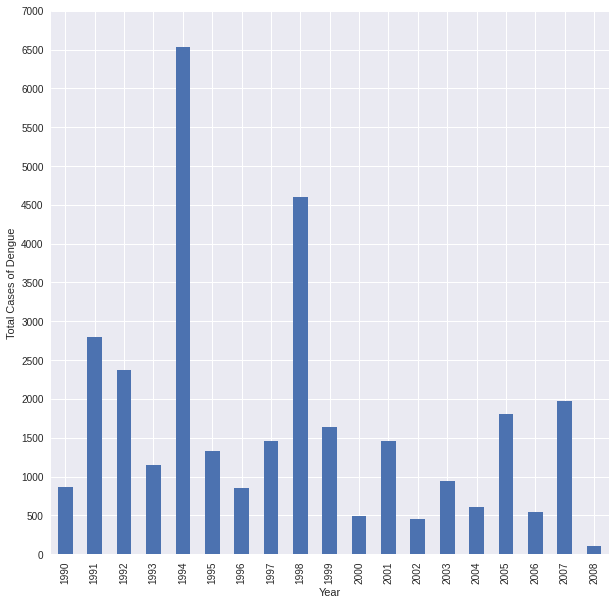

In [2303]:
year_max_cases = dengue_labels.groupby(['year'])['total_cases'].agg('sum')

#Visualizing it
year_max_cases.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.yticks(np.arange(0,7500, step=500))
plt.show()

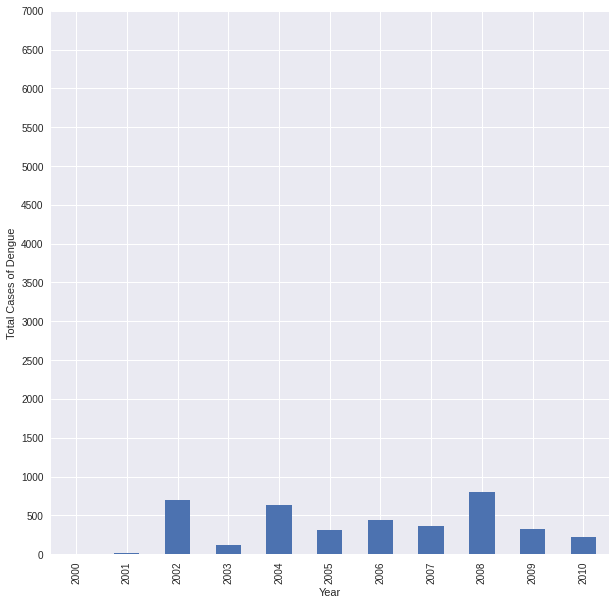

In [2304]:
year_max_cases = dengue_labelsIQ.groupby(['year'])['total_cases'].agg('sum')

#Visualizing it
year_max_cases.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Cases of Dengue')
plt.yticks(np.arange(0,7500, step=500))
plt.show()

### 1. Checking null entries

In [2305]:
dengue_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   936 non-null    object 
 1   year                                   936 non-null    int64  
 2   weekofyear                             936 non-null    int64  
 3   week_start_date                        936 non-null    object 
 4   ndvi_ne                                745 non-null    float64
 5   ndvi_nw                                887 non-null    float64
 6   ndvi_se                                917 non-null    float64
 7   ndvi_sw                                917 non-null    float64
 8   reanalysis_air_temp_k                  930 non-null    float64
 9   reanalysis_avg_temp_k                  930 non-null    float64
 10  reanalysis_dew_point_temp_k            930 non-null    float64
 11  reanal

In [2306]:
dengue_featuresIQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   520 non-null    object 
 1   year                                   520 non-null    int64  
 2   weekofyear                             520 non-null    int64  
 3   week_start_date                        520 non-null    object 
 4   ndvi_ne                                517 non-null    float64
 5   ndvi_nw                                517 non-null    float64
 6   ndvi_se                                517 non-null    float64
 7   ndvi_sw                                517 non-null    float64
 8   reanalysis_air_temp_k                  516 non-null    float64
 9   reanalysis_avg_temp_k                  516 non-null    float64
 10  reanalysis_dew_point_temp_k            516 non-null    float64
 11  reanal

In [2307]:
# Checking columns having null values
dengue_features.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_specific_humidity_g_per_kg      6
station_avg_temp_c                         6
station_max_temp_c                         6
station_min_temp_c                         6
dtype: int64

In [2308]:
# Checking columns having null values
dengue_featuresIQ.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  3
ndvi_nw                                  3
ndvi_se                                  3
ndvi_sw                                  3
reanalysis_air_temp_k                    4
reanalysis_avg_temp_k                    4
reanalysis_dew_point_temp_k              4
reanalysis_min_air_temp_k                4
reanalysis_precip_amt_kg_per_m2          4
reanalysis_relative_humidity_percent     4
reanalysis_specific_humidity_g_per_kg    4
station_min_temp_c                       8
dtype: int64

In [2309]:
# Getting the list of columns having missing values
x = dengue_features.columns[dengue_features.isna().sum() > 0].tolist()
x

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_specific_humidity_g_per_kg',
 'station_avg_temp_c',
 'station_max_temp_c',
 'station_min_temp_c']

In [2310]:
# Getting the list of columns having missing values
x1 = dengue_featuresIQ.columns[dengue_featuresIQ.isna().sum() > 0].tolist()
x1

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_specific_humidity_g_per_kg',
 'station_min_temp_c']

In [2311]:
# Filling the missing value with mean
for i in x:
    dengue_features[i] = dengue_features[i].fillna(dengue_features[i].mean())

In [2312]:
for i in x1:
    dengue_featuresIQ[i] = dengue_featuresIQ[i].fillna(dengue_featuresIQ[i].mean())

### Converting all the temperatures from Kelvin to Centigrade

In [2313]:
temperature_kelvin_columns = [i for i in dengue_features.columns if i.find('_temp_k') > -1]
temperature_kelvin_columns

['reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k']

In [2314]:
temperature_kelvin_columns = [i for i in dengue_featuresIQ.columns if i.find('_temp_k') > -1]
temperature_kelvin_columns

['reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_min_air_temp_k']

In [2315]:
for i in temperature_kelvin_columns:
    dengue_features[i] = dengue_features[i] - 273.15

In [2316]:
for i in temperature_kelvin_columns:
    dengue_featuresIQ[i] = dengue_featuresIQ[i] - 273.15

In [2317]:
# Changing the column names from _temp_k to _temp_c
dengue_features.columns = [i.replace('_temp_k', '_temp_c') 
                           for i in dengue_features.columns if i.find('_temp_k')]

In [2318]:
# Changing the column names from _temp_k to _temp_c
dengue_featuresIQ.columns = [i.replace('_temp_k', '_temp_c') 
                           for i in dengue_featuresIQ.columns if i.find('_temp_k')]

## 2. Rounding every value upto 3 decimal places

In [2319]:
dengue_features = dengue_features.round(3)

dengue_features.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c
0,sj,1990,18,4/30/1990,0.123,0.104,0.198,0.178,24.423,24.593,19.264,299.8,22.75,32.00,73.366,14.013,25.443,29.4,20.0
1,sj,1990,19,5/7/1990,0.170,0.142,0.162,0.155,25.061,25.293,20.801,300.9,23.25,17.94,77.369,15.373,26.714,31.7,22.2
2,sj,1990,20,5/14/1990,0.032,0.173,0.157,0.171,25.631,25.729,22.284,300.5,24.15,26.10,82.053,16.849,26.714,32.2,22.8
3,sj,1990,21,5/21/1990,0.129,0.245,0.228,0.236,25.837,26.079,22.160,301.4,23.85,13.90,80.337,16.673,27.471,33.3,23.3
4,sj,1990,22,5/28/1990,0.196,0.262,0.251,0.247,26.369,26.514,22.671,301.9,24.35,12.20,80.460,17.210,28.943,35.0,23.9


In [2320]:
dengue_featuresIQ = dengue_featuresIQ.round(3)

dengue_featuresIQ.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_min_temp_c
0,iq,2000,26,7/1/2000,0.193,0.132,0.341,0.247,23.590,25.300,22.034,19.95,43.19,92.419,16.651,20.7
1,iq,2000,27,7/8/2000,0.217,0.276,0.289,0.242,23.484,25.279,22.209,17.95,46.00,93.581,16.863,20.8
2,iq,2000,28,7/15/2000,0.177,0.173,0.204,0.128,23.266,24.243,22.473,19.45,64.77,95.849,17.120,20.7
3,iq,2000,29,7/22/2000,0.228,0.145,0.254,0.200,22.207,23.079,19.647,15.45,23.96,87.234,14.431,14.7
4,iq,2000,30,7/29/2000,0.329,0.322,0.254,0.361,23.283,24.486,20.807,18.35,31.80,88.161,15.444,19.1


In [2321]:
# Adding total cases
dengue_features['total_cases'] = dengue_labels['total_cases']

In [2322]:
# Adding total cases
dengue_featuresIQ['total_cases'] = dengue_labelsIQ['total_cases']

## Feature Engineering

### 3. The dengue cases of San Juan sj and Iquitos iq are not dependent. So splitting them into different DataFrames

In [2323]:
X_sj = dengue_features[dengue_features['city'] == 'sj']
X_iq = dengue_featuresIQ[dengue_featuresIQ['city'] == 'iq']



In [2324]:
X_sj = X_sj.drop(['city', 'weekofyear', 'week_start_date'], axis=1)
X_iq = X_iq.drop(['city', 'weekofyear', 'week_start_date'], axis=1)

X_sj

,year,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,total_cases
0,1990,0.123,0.104,0.198,0.178,24.423,24.593,19.264,299.8,22.75,32.00,73.366,14.013,25.443,29.4,20.0,4
1,1990,0.170,0.142,0.162,0.155,25.061,25.293,20.801,300.9,23.25,17.94,77.369,15.373,26.714,31.7,22.2,5
2,1990,0.032,0.173,0.157,0.171,25.631,25.729,22.284,300.5,24.15,26.10,82.053,16.849,26.714,32.2,22.8,4
3,1990,0.129,0.245,0.228,0.236,25.837,26.079,22.160,301.4,23.85,13.90,80.337,16.673,27.471,33.3,23.3,3
4,1990,0.196,0.262,0.251,0.247,26.369,26.514,22.671,301.9,24.35,12.20,80.460,17.210,28.943,35.0,23.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,2008,0.078,-0.040,0.310,0.296,23.809,23.807,18.946,299.7,21.25,7.55,74.247,13.644,25.043,30.0,21.1,4
932,2008,-0.038,-0.017,0.119,0.066,24.931,25.079,20.086,299.8,23.35,3.67,74.600,14.663,26.243,30.6,22.2,3
933,2008,-0.155,-0.053,0.138,0.141,24.310,24.414,19.583,299.4,22.65,35.00,75.027,14.184,25.000,29.4,21.7,1
934,2008,0.002,0.067,0.204,0.210,24.480,24.629,19.124,299.7,22.75,4.82,72.286,13.859,25.314,29.4,21.7,3


In [2325]:
one_hot_sj = pd.get_dummies(X_sj['year'])
X_sj = X_sj.drop('year', axis=1)
X_sj = X_sj.join(one_hot_sj)

In [2326]:
one_hot_iq = pd.get_dummies(X_iq['year'])
X_iq = X_iq.drop('year', axis=1)
X_iq = X_iq.join(one_hot_iq)

## 4. Changing the order of columns in X_sj and X_iq DataFrames

In [2327]:
years = X_sj.columns[:15:-1].values.tolist()
X_sj = X_sj[years[::-1]].join(X_sj[X_sj.columns[:16]])
X_sj.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,total_cases
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.123,0.104,0.198,0.178,24.423,24.593,19.264,299.8,22.75,32.00,73.366,14.013,25.443,29.4,20.0,4
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.170,0.142,0.162,0.155,25.061,25.293,20.801,300.9,23.25,17.94,77.369,15.373,26.714,31.7,22.2,5
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.032,0.173,0.157,0.171,25.631,25.729,22.284,300.5,24.15,26.10,82.053,16.849,26.714,32.2,22.8,4
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.129,0.245,0.228,0.236,25.837,26.079,22.160,301.4,23.85,13.90,80.337,16.673,27.471,33.3,23.3,3
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.196,0.262,0.251,0.247,26.369,26.514,22.671,301.9,24.35,12.20,80.460,17.210,28.943,35.0,23.9,6


In [2328]:
years = X_iq.columns[:12:-1].values.tolist()
X_iq = X_iq[years[::-1]].join(X_iq[X_iq.columns[:13]])
X_iq.tail()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_min_temp_c,total_cases
515,0,0,0,0,0,0,0,0,0,0,1,0.343,0.319,0.256,0.293,26.184,27.621,23.676,21.35,45.00,88.766,18.486,22.4,5
516,0,0,0,0,0,0,0,0,0,0,1,0.160,0.160,0.136,0.226,25.180,26.243,23.303,18.75,207.10,91.600,18.070,21.7,8
517,0,0,0,0,0,0,0,0,0,0,1,0.247,0.146,0.250,0.234,23.449,24.443,22.351,19.25,50.60,94.280,17.009,19.2,1
518,0,0,0,0,0,0,0,0,0,0,1,0.334,0.246,0.279,0.325,23.196,24.371,22.174,18.75,62.33,94.660,16.816,21.0,1
519,0,0,0,0,0,0,0,0,0,0,1,0.298,0.233,0.274,0.316,24.947,26.686,22.657,19.15,36.90,89.083,17.356,22.2,4


In [2329]:
# Removing dummy variable trap
X_sj = X_sj.drop(1990, axis=1)
X_iq = X_iq.drop(2010, axis=1)

X_sj

,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,total_cases
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.123,0.104,0.198,0.178,24.423,24.593,19.264,299.8,22.75,32.00,73.366,14.013,25.443,29.4,20.0,4
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.170,0.142,0.162,0.155,25.061,25.293,20.801,300.9,23.25,17.94,77.369,15.373,26.714,31.7,22.2,5
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.032,0.173,0.157,0.171,25.631,25.729,22.284,300.5,24.15,26.10,82.053,16.849,26.714,32.2,22.8,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.129,0.245,0.228,0.236,25.837,26.079,22.160,301.4,23.85,13.90,80.337,16.673,27.471,33.3,23.3,3
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.196,0.262,0.251,0.247,26.369,26.514,22.671,301.9,24.35,12.20,80.460,17.210,28.943,35.0,23.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.078,-0.040,0.310,0.296,23.809,23.807,18.946,299.7,21.25,7.55,74.247,13.644,25.043,30.0,21.1,4
932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.038,-0.017,0.119,0.066,24.931,25.079,20.086,299.8,23.35,3.67,74.600,14.663,26.243,30.6,22.2,3
933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.155,-0.053,0.138,0.141,24.310,24.414,19.583,299.4,22.65,35.00,75.027,14.184,25.000,29.4,21.7,1
934,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.002,0.067,0.204,0.210,24.480,24.629,19.124,299.7,22.75,4.82,72.286,13.859,25.314,29.4,21.7,3


In [2330]:
x_sj_arr = X_sj.iloc[:].values
x_iq_arr = X_iq.iloc[:].values
x_sj_arr[1]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e-01, 1.4200e-01,
       1.6200e-01, 1.5500e-01, 2.5061e+01, 2.5293e+01, 2.0801e+01,
       3.0090e+02, 2.3250e+01, 1.7940e+01, 7.7369e+01, 1.5373e+01,
       2.6714e+01, 3.1700e+01, 2.2200e+01, 5.0000e+00])

In [2331]:
# np.random.seed(23)
np.random.shuffle(x_sj_arr)
np.random.shuffle(x_iq_arr)

x_sj_arr[1]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 5.8000e-02, 2.0800e-01,
       1.5100e-01, 1.4700e-01, 2.3939e+01, 2.4071e+01, 1.9024e+01,
       2.9890e+02, 2.2150e+01, 1.3410e+01, 7.4064e+01, 1.3670e+01,
       2.4771e+01, 2.8300e+01, 2.0600e+01, 4.0000e+00])

## 5. Splitting the dataframes into train and test

In [2332]:
from sklearn.model_selection import train_test_split

X_sj_train, X_sj_test, y_sj_train, y_sj_test = train_test_split(x_sj_arr[:, :-1], x_sj_arr[:, -1], test_size=0.3)
X_iq_train, X_iq_test, y_iq_train, y_iq_test = train_test_split(x_iq_arr[:, :-1], x_iq_arr[:, -1], test_size=0.3)

y_sj_test

array([  3.,  11.,   3.,  23.,  19.,  48.,  46.,  82.,  14.,  84.,  64.,
        73.,  18.,  65.,  71.,   5.,   6.,  12.,  16.,   6.,  67.,  15.,
       108.,  14.,  33.,  33.,  20., 179.,  49.,  13.,   3.,  31.,  55.,
         2.,  18.,  10.,   3.,  10.,  19.,  16.,  18.,  27.,  15.,   6.,
        25.,  28.,  29.,  14.,  11.,  78.,   6., 202.,  60.,  42.,  15.,
         3.,  76.,   6.,   5.,   6.,  18.,  26.,  27.,  42.,  33.,  16.,
         9.,   9.,   4.,  30.,   1.,  89.,   1.,  20.,  43.,  17.,   6.,
        18.,   3.,  14.,   7.,  92.,  61.,  51.,  13.,  64.,  21.,  34.,
         7.,  34.,   9.,   8.,   4.,  18., 221.,  27.,   7.,   3.,  14.,
        31.,  14.,  38.,  17.,  34.,  48.,   4.,   4.,  85.,  40.,  47.,
        20., 142.,   3., 154.,  11.,  66.,   4.,  18.,  72.,  10.,  59.,
       115.,   4.,   5.,  34.,  65.,  22.,   8.,  19., 191.,   0.,  45.,
        73.,  75.,  50.,  13.,  17.,  47.,  50.,   6.,   8.,  46.,   8.,
        35., 112.,  10., 150.,  19., 127.,   8.,   

## 6. Applying Feature Scaling

In [2333]:
from sklearn.preprocessing import StandardScaler

sj_scaler = StandardScaler()
X_sj_train = sj_scaler.fit_transform(X_sj_train)
X_sj_test = sj_scaler.transform(X_sj_test)

# Time for modelling

# KNeighborsRegressor

In [2334]:
from sklearn.neighbors import KNeighborsRegressor

sj_knn = KNeighborsRegressor(n_neighbors=5)

sj_knn.fit(X_sj_train, y_sj_train)

KNeighborsRegressor()

In [2335]:
y_sj_pred = sj_knn.predict(X_sj_test)

y_sj_test

array([  3.,  11.,   3.,  23.,  19.,  48.,  46.,  82.,  14.,  84.,  64.,
        73.,  18.,  65.,  71.,   5.,   6.,  12.,  16.,   6.,  67.,  15.,
       108.,  14.,  33.,  33.,  20., 179.,  49.,  13.,   3.,  31.,  55.,
         2.,  18.,  10.,   3.,  10.,  19.,  16.,  18.,  27.,  15.,   6.,
        25.,  28.,  29.,  14.,  11.,  78.,   6., 202.,  60.,  42.,  15.,
         3.,  76.,   6.,   5.,   6.,  18.,  26.,  27.,  42.,  33.,  16.,
         9.,   9.,   4.,  30.,   1.,  89.,   1.,  20.,  43.,  17.,   6.,
        18.,   3.,  14.,   7.,  92.,  61.,  51.,  13.,  64.,  21.,  34.,
         7.,  34.,   9.,   8.,   4.,  18., 221.,  27.,   7.,   3.,  14.,
        31.,  14.,  38.,  17.,  34.,  48.,   4.,   4.,  85.,  40.,  47.,
        20., 142.,   3., 154.,  11.,  66.,   4.,  18.,  72.,  10.,  59.,
       115.,   4.,   5.,  34.,  65.,  22.,   8.,  19., 191.,   0.,  45.,
        73.,  75.,  50.,  13.,  17.,  47.,  50.,   6.,   8.,  46.,   8.,
        35., 112.,  10., 150.,  19., 127.,   8.,   

16.8846975088968


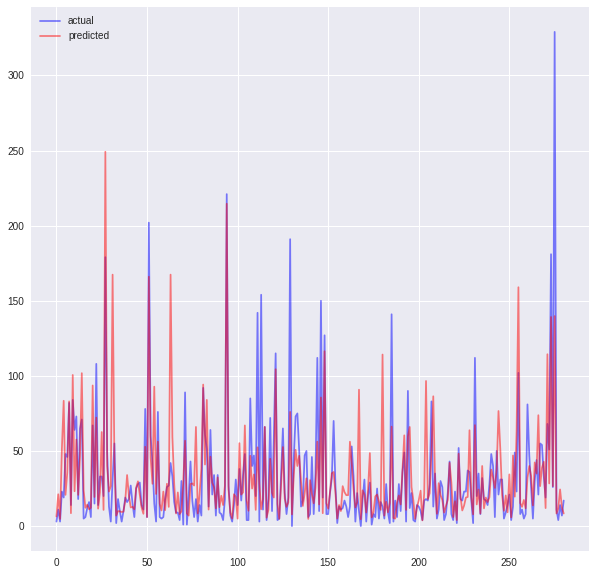

In [2336]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns # for visualiation


print(mean_absolute_error(y_sj_test, y_sj_pred))

plt.plot(y_sj_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_sj_pred, alpha=.5, color='red', label = "predicted")
plt.legend()

In [2337]:
iq_scaler = StandardScaler()
X_iq_train = iq_scaler.fit_transform(X_iq_train)
X_iq_test = iq_scaler.transform(X_iq_test)

In [2338]:
iq_knn = KNeighborsRegressor(n_neighbors=5)

iq_knn.fit(X_iq_train, y_iq_train)

KNeighborsRegressor()

6.306410256410256


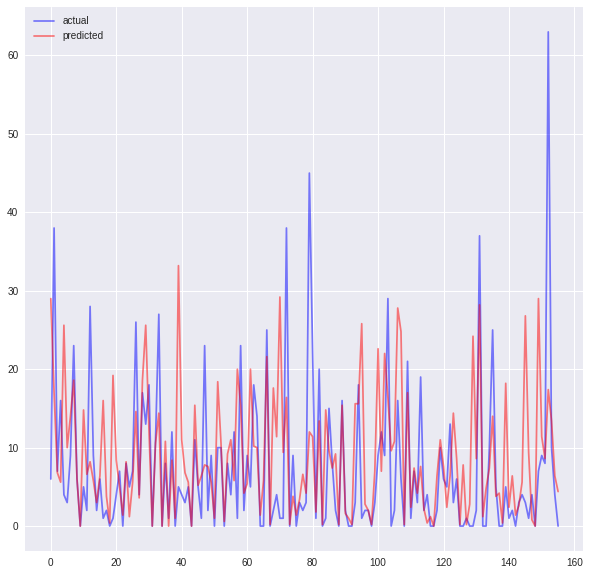

In [2339]:
y_iq_pred = iq_knn.predict(X_iq_test)
print(mean_absolute_error(y_iq_test, y_iq_pred))

plt.plot(y_iq_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_iq_pred, alpha=.5, color='red', label = "predicted")
plt.legend()

# Random Forest

17.341725232854184


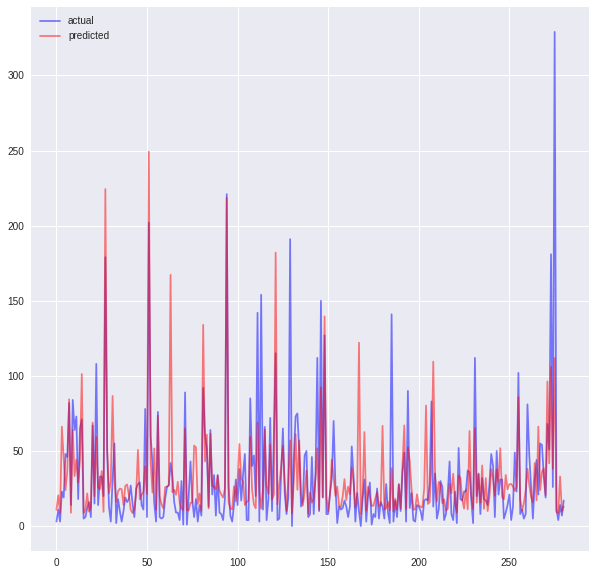

In [2340]:
from sklearn.ensemble import RandomForestRegressor

sj_ada = RandomForestRegressor(n_estimators=50, max_depth=15)
sj_ada.fit(X_sj_train, y_sj_train)

y_sj_pred = sj_ada.predict(X_sj_test)

print(mean_absolute_error(y_sj_test, y_sj_pred))

plt.plot(y_sj_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_sj_pred, alpha=.5, color='red', label = "predicted")
plt.legend()

6.3438549200872485


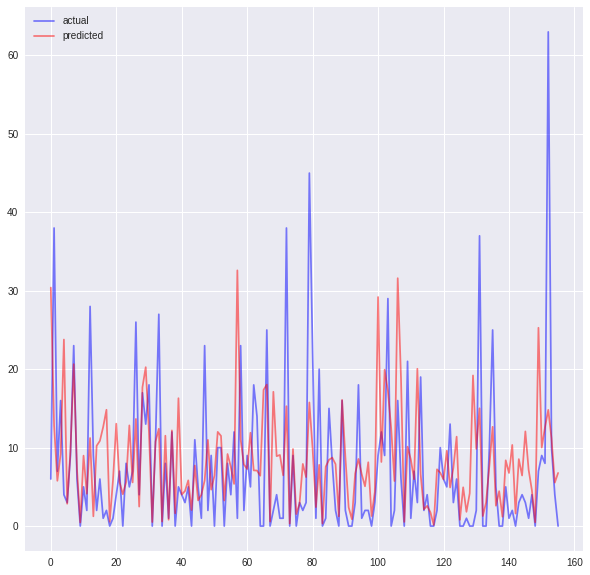

In [2341]:
iq_ada = RandomForestRegressor(n_estimators=50, max_depth=15)
iq_ada.fit(X_iq_train, y_iq_train)

y_iq_pred = iq_ada.predict(X_iq_test)

print(mean_absolute_error(y_iq_test, y_iq_pred))

plt.plot(y_iq_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_iq_pred, alpha=.5, color='red', label = "predicted")
plt.legend()

# GradientBoostingRegressor

sj MAE :  17.147356689613243


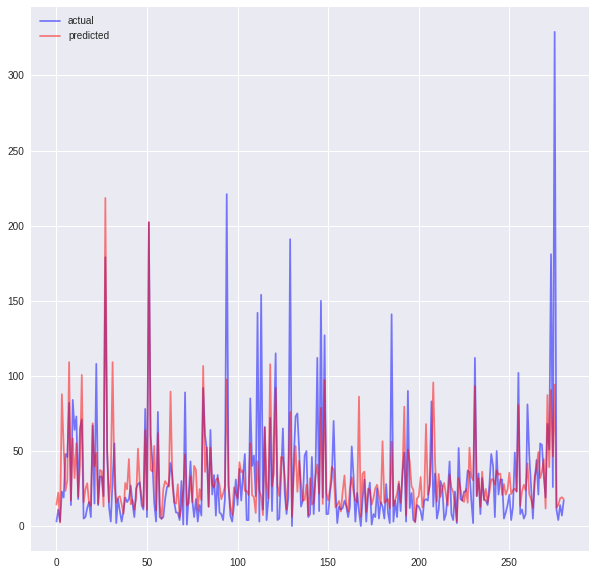

In [2342]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
import seaborn as sns # for visualiation
from sklearn.pipeline import make_pipeline  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV  
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_sj_train, y_sj_train)

y_sj_pred = gb_reg.predict( X_sj_test)

print("sj MAE : ", mean_absolute_error(y_sj_test, y_sj_pred))

plt.plot(y_sj_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_sj_pred, alpha=.5, color='red', label = "predicted")
plt.legend()


iq MAE :  6.655822090999532


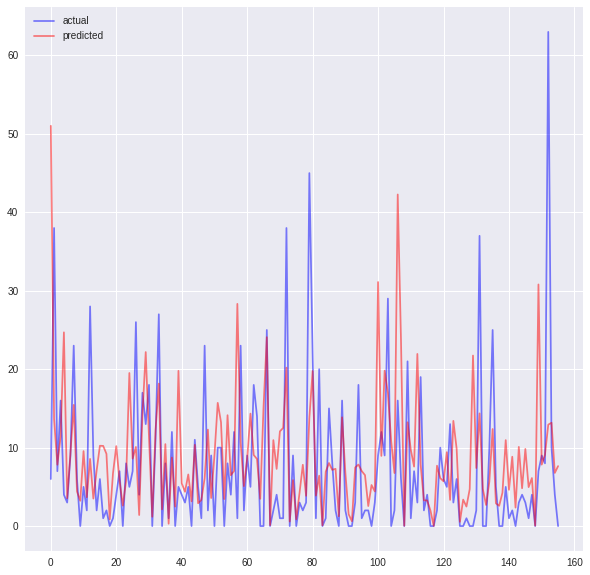

In [2343]:
gb_reg.fit(X_iq_train, y_iq_train)
y_iq_pred = gb_reg.predict(X_iq_test)

print("iq MAE : ", mean_absolute_error(y_iq_test, y_iq_pred))

plt.plot(y_iq_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_iq_pred, alpha=.5, color='red', label = "predicted")
plt.legend()

# SupportVectorRegresor

sj MAE :  19.92537486114598


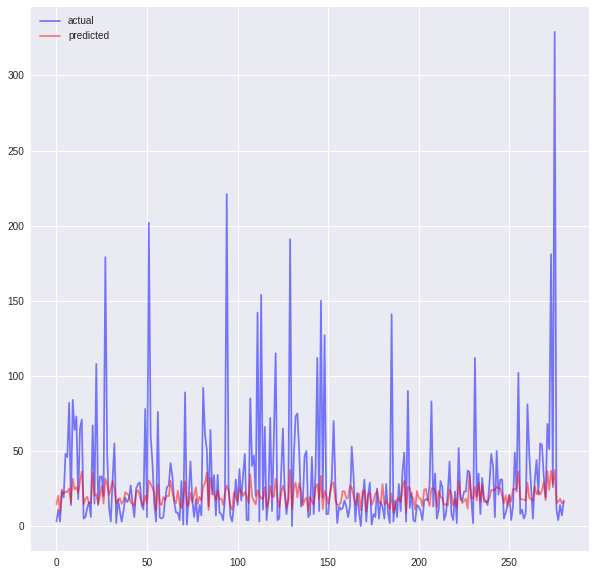

In [2344]:
grid_search_svr = SVR()
grid_search_svr.fit(X_sj_train, y_sj_train)

y_sj_pred = grid_search_svr.predict( X_sj_test)

print("sj MAE : ", mean_absolute_error(y_sj_test, y_sj_pred))

plt.plot(y_sj_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_sj_pred, alpha=.5, color='red', label = "predicted")
plt.legend()

iq MAE :  4.912192573091029


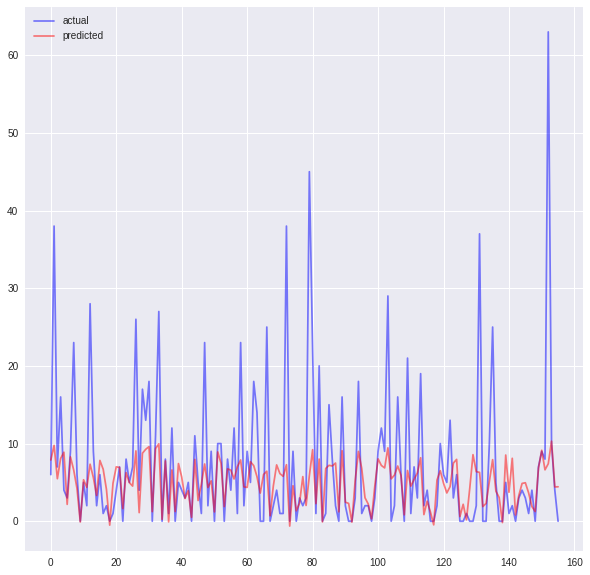

In [2345]:
grid_search_svr.fit(X_iq_train, y_iq_train)
y_iq_pred = grid_search_svr.predict(X_iq_test)

print("iq MAE : ", mean_absolute_error(y_iq_test, y_iq_pred))

plt.plot(y_iq_test, alpha=.5,color='blue', label = "actual")
plt.plot(y_iq_pred, alpha=.5, color='red', label = "predicted")
plt.legend()

# TEST

In [2786]:
# Importing the modules
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

dengue_tfeaturesSJ = pd.read_csv('/content/SJ_dengue_features_test_417-null-data.csv')
dengue_tfeaturesIQ = pd.read_csv('/content/test_iq.csv')

print('{:>26} {:>11}'.format('Rows', 'Columns'))

print('Dengue tFeatures SJ' + '{:>11} {:>8}'.format(dengue_tfeaturesSJ.shape[0], dengue_tfeaturesSJ.shape[1]))
print('Dengue tFeatures IQ' + '{:>11} {:>8}'.format(dengue_tfeaturesIQ.shape[0], dengue_tfeaturesIQ.shape[1]))

                      Rows     Columns
Dengue tFeatures SJ        260       33
Dengue tFeatures IQ        156       24


# Data Preprocessing

### 1. Checking null entries

In [2787]:
dengue_tfeaturesSJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   260 non-null    object 
 1   year                                   260 non-null    int64  
 2   weekofyear                             260 non-null    int64  
 3   week_start_date                        260 non-null    object 
 4   ndvi_ne                                217 non-null    float64
 5   ndvi_nw                                249 non-null    float64
 6   ndvi_se                                259 non-null    float64
 7   ndvi_sw                                259 non-null    float64
 8   reanalysis_air_temp_k                  258 non-null    float64
 9   reanalysis_avg_temp_k                  258 non-null    float64
 10  reanalysis_dew_point_temp_k            258 non-null    float64
 11  reanal

In [2788]:
dengue_tfeaturesIQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   156 non-null    object 
 1   year                                   156 non-null    int64  
 2   weekofyear                             156 non-null    int64  
 3   week_start_date                        156 non-null    object 
 4   ndvi_ne                                156 non-null    float64
 5   ndvi_nw                                156 non-null    float64
 6   ndvi_se                                156 non-null    float64
 7   ndvi_sw                                156 non-null    float64
 8   reanalysis_air_temp_k                  156 non-null    float64
 9   reanalysis_dew_point_temp_k            156 non-null    float64
 10  reanalysis_min_air_temp_k              156 non-null    float64
 11  reanal

In [2789]:
# Checking columns having null values
dengue_tfeaturesSJ.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_specific_humidity_g_per_kg     2
station_avg_temp_c                        2
station_max_temp_c                        2
station_min_temp_c                        2
total_cases                               0
1                                         0
2                                         0
3                               

In [2790]:
dengue_tfeaturesIQ.isna().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                   0
ndvi_nw                                   0
ndvi_se                                   0
ndvi_sw                                   0
reanalysis_air_temp_k                     0
reanalysis_dew_point_temp_k               0
reanalysis_min_air_temp_k                 0
reanalysis_precip_amt_kg_per_m2           0
reanalysis_relative_humidity_percent      0
reanalysis_specific_humidity_g_per_kg     0
station_avg_temp_c                       10
station_min_temp_c                        7
total_cases                               0
7                                         0
8                                         0
9                                         0
10                                        0
11                                        0
12                              

In [2791]:
# Getting the list of columns having missing values
x = dengue_tfeaturesSJ.columns[dengue_tfeaturesSJ.isna().sum() > 0].tolist()
x

['ndvi_ne',
 'ndvi_nw',
 'ndvi_se',
 'ndvi_sw',
 'reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_precip_amt_kg_per_m2',
 'reanalysis_relative_humidity_percent',
 'reanalysis_specific_humidity_g_per_kg',
 'station_avg_temp_c',
 'station_max_temp_c',
 'station_min_temp_c']

In [2792]:
# Getting the list of columns having missing values
x1 = dengue_tfeaturesIQ.columns[dengue_tfeaturesIQ.isna().sum() > 0].tolist()
x1

['station_avg_temp_c', 'station_min_temp_c']

In [2793]:
# Filling the missing value with mean
for i in x:
    dengue_tfeaturesSJ[i] = dengue_tfeaturesSJ[i].fillna(dengue_tfeaturesSJ[i].mean())

In [2794]:
for i in x1:
    dengue_tfeaturesIQ[i] = dengue_tfeaturesIQ[i].fillna(dengue_tfeaturesIQ[i].mean())

### Converting all the temperatures from Kelvin to Centigrade

In [2795]:
temperature_kelvin_columns = [i for i in dengue_tfeaturesSJ.columns if i.find('_temp_k') > -1]
temperature_kelvin_columns

['reanalysis_air_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_dew_point_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k']

In [2796]:
temperature_kelvin_columns = [i for i2 in dengue_tfeaturesIQ.columns if i.find('_temp_k') > -1]
temperature_kelvin_columns

[]

In [2797]:
for i in temperature_kelvin_columns:
    dengue_tfeaturesSJ[i] = dengue_tfeaturesSJ[i] - 273.15

In [2798]:
for i in temperature_kelvin_columns:
    dengue_tfeaturesIQ[i] = dengue_tfeaturesIQ[i] - 273.15

In [2799]:
# Changing the column names from _temp_k to _temp_c
dengue_tfeaturesSJ.columns = [i.replace('_temp_k', '_temp_c') 
                           for i in dengue_tfeaturesSJ.columns if i.find('_temp_k')]

In [2800]:
dengue_tfeaturesIQ.columns = [i.replace('_temp_k', '_temp_c') 
                           for i in dengue_tfeaturesIQ.columns if i.find('_temp_k')]

## 2. Rounding every value upto 3 decimal places

In [2801]:
dengue_tfeaturesSJ = dengue_tfeaturesSJ.round(3)

dengue_tfeaturesSJ.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,total_cases,1,2,3,4,5,6,7,8,9,10,11,12,13
255,sj,2013,13,3/26/2013,-0.087,-0.016,0.156,0.105,298.670,298.886,294.676,301.3,296.4,2.55,78.780,15.986,27.543,33.9,22.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
256,sj,2013,14,4/2/2013,-0.203,-0.078,0.204,0.179,298.036,298.157,294.629,301.5,295.9,64.30,81.650,15.881,26.643,33.3,22.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0
257,sj,2013,15,4/9/2013,-0.118,-0.008,0.193,0.170,299.057,299.329,294.949,301.5,297.5,0.70,78.286,16.213,27.914,32.8,23.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
258,sj,2013,16,4/16/2013,0.083,0.031,0.135,0.075,298.913,299.064,294.679,300.9,297.3,1.40,77.674,15.966,27.729,31.7,23.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0
259,sj,2013,17,4/23/2013,-0.087,-0.049,0.130,0.118,298.067,298.043,294.133,300.2,296.6,19.90,79.046,15.451,26.443,31.1,21.7,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2802]:
dengue_tfeaturesIQ = dengue_tfeaturesIQ.round(3)

dengue_tfeaturesIQ.tail()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_c,reanalysis_dew_point_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_min_temp_c,total_cases,7,8,9,10,11,12,13
151,iq,2013,22,5/28/2013,0.301,0.380,0.281,0.383,297.774,295.639,292.7,67.60,89.990,17.186,27.40,21.8,0,0,0,0,0,0,0,0
152,iq,2013,23,6/4/2013,0.248,0.296,0.285,0.350,297.167,295.846,291.6,45.70,93.891,17.449,27.52,21.4,0,0,0,0,0,0,0,0
153,iq,2013,24,6/11/2013,0.239,0.251,0.253,0.250,295.831,294.894,290.7,45.22,94.967,16.410,27.20,21.6,0,0,0,0,0,0,0,0
154,iq,2013,25,6/18/2013,0.310,0.303,0.407,0.404,295.779,293.649,292.5,4.70,89.057,15.137,26.70,21.8,0,0,0,0,0,0,0,0
155,iq,2013,26,6/25/2013,0.339,0.240,0.357,0.274,297.373,294.616,289.6,27.80,87.030,16.149,27.35,22.0,0,0,0,0,0,0,0,0


In [2803]:
# Summary statistics
dengue_tfeaturesSJ.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,total_cases,1,2,3,4,5,6,7,8,9,10,11,12,13
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0,260.0
mean,2010.326923,26.503846,0.024827,0.036765,0.177046,0.153246,299.458054,299.542965,295.322019,301.596515,297.572869,23.766277,78.203015,16.753381,27.272546,31.677131,23.107362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,1.492855,15.043951,0.122155,0.085159,0.066733,0.055017,1.277286,1.264086,1.657311,1.308521,1.355398,34.413606,3.390325,1.673744,1.414378,1.700755,1.491722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2008.000000,1.000000,-0.463000,-0.212000,0.006000,-0.015000,296.651000,296.793000,290.819000,298.200000,293.800000,0.000000,64.920000,12.537000,24.157000,27.200000,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2009.000000,13.750000,-0.030250,-0.005250,0.132000,0.116750,298.272250,298.398250,294.050000,300.375000,296.600000,6.762500,76.057750,15.376500,26.071000,30.600000,21.700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2010.000000,26.500000,0.025000,0.035500,0.169000,0.149000,299.739000,299.753500,295.653000,301.900000,297.700000,15.335000,78.336000,17.033000,27.407000,31.700000,23.203500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2012.000000,39.250000,0.068500,0.076250,0.218000,0.191500,300.642500,300.724750,296.755750,302.600000,298.800000,29.000000,80.421500,18.182250,28.514000,32.800000,24.400000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2013.000000,53.000000,0.500000,0.649000,0.385000,0.318000,301.507000,301.543000,297.794000,304.100000,299.700000,301.400000,86.781000,19.340000,30.271000,35.000000,26.700000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2804]:
# Summary statistics
dengue_tfeaturesIQ.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_c,reanalysis_dew_point_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_min_temp_c,total_cases,7,8,9,10,11,12,13
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.0,156.0,156.0,156.0,156.0,156.0,156.0,156.0
mean,2011.500000,26.333333,0.266910,0.270577,0.258577,0.282237,297.760256,295.579936,292.717949,72.609936,89.606083,17.214410,27.541058,21.089250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.960511,14.915821,0.074614,0.078575,0.071385,0.084301,1.104403,1.244972,1.568541,53.839037,6.655126,1.285388,0.751040,1.285459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2010.000000,1.000000,0.089000,0.063000,0.098000,0.082000,294.554000,291.954000,286.200000,2.600000,66.310000,13.737000,24.840000,14.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2011.000000,13.750000,0.215000,0.222000,0.211750,0.217750,297.094000,294.790750,291.875000,35.625000,86.316750,16.332000,27.045750,20.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2011.500000,26.000000,0.265000,0.269500,0.253500,0.281500,297.752500,295.935500,292.950000,59.300000,91.411500,17.552500,27.541000,21.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2012.000000,39.000000,0.319250,0.325000,0.301750,0.347500,298.338000,296.482750,293.800000,98.975000,94.742500,18.169500,28.012500,21.850000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2013.000000,52.000000,0.430000,0.465000,0.453000,0.529000,301.936000,297.726000,296.000000,280.420000,97.983000,19.599000,29.133000,23.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Engineering

### 3. The dengue cases of San Juan sj and Iquitos iq are not dependent. So splitting them into different DataFrames

In [2805]:
T_sj = dengue_tfeaturesSJ[dengue_tfeaturesSJ['city'] == 'sj']
T_iq = dengue_tfeaturesIQ[dengue_tfeaturesIQ['city'] == 'iq']

In [2806]:
T_sj = T_sj.drop(['city', 'weekofyear', 'week_start_date'], axis=1)
T_iq = T_iq.drop(['city','weekofyear', 'week_start_date'], axis=1)

In [2807]:
one_hot_sj = pd.get_dummies(T_sj['year'])
T_sj = T_sj.drop('year', axis=1)
T_sj = T_sj.join(one_hot_sj)

In [2808]:
one_hot_iq = pd.get_dummies(T_iq['year'])
T_iq = T_iq.drop('year', axis=1)
T_iq = T_iq.join(one_hot_iq)

## 4. Changing the order of columns in X_sj and X_iq DataFrames

In [2809]:
years = T_sj.columns[:19:-1].values.tolist()

T_sj = T_sj[years[::-1]].join(T_sj[T_sj.columns[:20]])

print('Dengue tFeatures' + '{:>11} {:>8}'.format(T_sj.shape[0], T_sj.shape[1]))

T_sj.tail()

Dengue tFeatures        260       35


,5,6,7,8,9,10,11,12,13,2008,2009,2010,2011,2012,2013,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,total_cases,1,2,3,4
255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.087,-0.016,0.156,0.105,298.670,298.886,294.676,301.3,296.4,2.55,78.780,15.986,27.543,33.9,22.8,0,0,0,0,0
256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.203,-0.078,0.204,0.179,298.036,298.157,294.629,301.5,295.9,64.30,81.650,15.881,26.643,33.3,22.8,0,0,0,0,0
257,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.118,-0.008,0.193,0.170,299.057,299.329,294.949,301.5,297.5,0.70,78.286,16.213,27.914,32.8,23.3,0,0,0,0,0
258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.083,0.031,0.135,0.075,298.913,299.064,294.679,300.9,297.3,1.40,77.674,15.966,27.729,31.7,23.9,0,0,0,0,0
259,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.087,-0.049,0.130,0.118,298.067,298.043,294.133,300.2,296.6,19.90,79.046,15.451,26.443,31.1,21.7,0,0,0,0,0


In [2810]:
years = T_iq.columns[:15:-1].values.tolist()
T_iq = T_iq[years[::-1]].join(T_iq[T_iq.columns[:16]])
print('Dengue tFeatures' + '{:>11} {:>8}'.format(T_iq.shape[0], T_iq.shape[1]))
T_iq.head()

Dengue tFeatures        156       24


,10,11,12,13,2010,2011,2012,2013,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_c,reanalysis_dew_point_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_min_temp_c,total_cases,7,8,9
0,0,0,0,0,1,0,0,0,0.184,0.142,0.225,0.150,297.649,296.119,293.7,34.11,92.581,17.654,27.440,21.5,0,0,0,0
1,0,0,0,0,1,0,0,0,0.292,0.272,0.331,0.321,298.224,294.831,292.2,9.10,83.886,16.320,27.025,21.2,0,0,0,0
2,0,0,0,0,1,0,0,0,0.209,0.366,0.213,0.256,297.956,296.417,292.5,61.09,92.057,18.030,26.950,21.6,0,0,0,0
3,0,0,0,0,1,0,0,0,0.089,0.063,0.122,0.082,295.716,293.639,289.3,19.60,88.970,15.394,26.900,14.2,0,0,0,0
4,0,0,0,0,1,0,0,0,0.306,0.328,0.250,0.268,298.503,293.893,290.5,18.93,78.610,15.469,27.050,16.9,0,0,0,0


In [2811]:
# Removing dummy variable trap
T_sj = T_sj.drop(2013, axis=1)
T_iq = T_iq.drop(2010, axis=1)
T_sj

,5,6,7,8,9,10,11,12,13,2008,2009,2010,2011,2012,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_c,reanalysis_avg_temp_c,reanalysis_dew_point_temp_c,reanalysis_max_air_temp_c,reanalysis_min_air_temp_c,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,total_cases,1,2,3,4
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.019,-0.019,0.103,0.091,298.493,298.550,294.527,301.1,296.4,25.37,78.781,15.919,26.529,33.3,21.7,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.018,-0.012,0.082,0.072,298.476,298.557,294.396,300.8,296.7,21.83,78.230,15.791,26.071,30.0,22.2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.002,0.037,0.151,0.092,299.456,299.357,295.309,302.2,296.4,4.12,78.270,16.674,27.929,32.8,22.8,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.025,-0.020,0.124,0.126,299.690,299.729,294.403,303.0,296.9,2.20,73.016,15.776,28.057,33.3,24.4,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.057,0.040,0.062,0.076,299.780,299.671,294.760,302.3,297.3,4.36,74.084,16.137,27.614,33.3,23.3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.087,-0.016,0.156,0.105,298.670,298.886,294.676,301.3,296.4,2.55,78.780,15.986,27.543,33.9,22.8,0,0,0,0,0
256,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.203,-0.078,0.204,0.179,298.036,298.157,294.629,301.5,295.9,64.30,81.650,15.881,26.643,33.3,22.8,0,0,0,0,0
257,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.118,-0.008,0.193,0.170,299.057,299.329,294.949,301.5,297.5,0.70,78.286,16.213,27.914,32.8,23.3,0,0,0,0,0
258,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.083,0.031,0.135,0.075,298.913,299.064,294.679,300.9,297.3,1.40,77.674,15.966,27.729,31.7,23.9,0,0,0,0,0


In [2812]:
t_sj_arr = T_sj.iloc[:].values
t_iq_arr = T_iq.iloc[:].values

In [2813]:
#np.random.seed(26)
np.random.shuffle(t_sj_arr)
np.random.shuffle(t_iq_arr)


T_sj_test =  (t_sj_arr[:, :-1])

T_iq_test = (t_iq_arr[:, :-1])



In [2814]:
from sklearn.preprocessing import StandardScaler

sj_scaler1 = StandardScaler()
X_sj_train = sj_scaler1.fit_transform(X_sj_train)
T_sj_test = sj_scaler1.transform(T_sj_test)
T_sj_test

array([[-7.26306208e-17, -1.11107052e-16, -6.34776371e-17, ...,
        -9.74623266e-18, -4.23749246e-19,  3.72899337e-18],
       [-7.26306208e-17, -1.11107052e-16, -6.34776371e-17, ...,
        -9.74623266e-18, -4.23749246e-19,  3.72899337e-18],
       [-7.26306208e-17, -1.11107052e-16, -6.34776371e-17, ...,
        -9.74623266e-18, -4.23749246e-19,  3.72899337e-18],
       ...,
       [-7.26306208e-17, -1.11107052e-16, -6.34776371e-17, ...,
        -9.74623266e-18, -4.23749246e-19,  3.72899337e-18],
       [-7.26306208e-17, -1.11107052e-16, -6.34776371e-17, ...,
        -9.74623266e-18, -4.23749246e-19,  3.72899337e-18],
       [-7.26306208e-17, -1.11107052e-16, -6.34776371e-17, ...,
        -9.74623266e-18, -4.23749246e-19,  3.72899337e-18]])

In [2815]:
iq_scaler1 = StandardScaler()
X_iq_train = iq_scaler1.fit_transform(X_iq_train)
T_iq_test = iq_scaler1.transform(T_iq_test)
T_iq_test

array([[ 2.77250750e-16, -2.74505693e-18, -1.61043340e-16, ...,
        -6.10012651e-19, -2.28754744e-18, -9.15018976e-18],
       [ 2.77250750e-16, -2.74505693e-18, -1.61043340e-16, ...,
        -6.10012651e-19, -2.28754744e-18, -9.15018976e-18],
       [ 2.77250750e-16, -2.74505693e-18, -1.61043340e-16, ...,
        -6.10012651e-19, -2.28754744e-18, -9.15018976e-18],
       ...,
       [ 2.77250750e-16, -2.74505693e-18, -1.61043340e-16, ...,
        -6.10012651e-19, -2.28754744e-18, -9.15018976e-18],
       [ 2.77250750e-16, -2.74505693e-18, -1.61043340e-16, ...,
        -6.10012651e-19, -2.28754744e-18, -9.15018976e-18],
       [ 2.77250750e-16, -2.74505693e-18, -1.61043340e-16, ...,
        -6.10012651e-19, -2.28754744e-18, -9.15018976e-18]])

# MODEL

# KNeighborsRegressor

In [2819]:
y_sj_pred1 = sj_knn.predict(T_sj_test).astype(int)

y_iq_pred1 = iq_knn.predict(T_iq_test).astype(int)

result_knn = pd.read_csv('/content/submission_format_417.csv')

result_knn.total_cases = np.concatenate([y_sj_pred1, y_iq_pred1])

result_knn.to_csv('/content/COpredicted_knn.csv', index=False)


y_sj_pred1

array([23, 23, 23, 24, 24, 24, 24, 23, 23, 24, 24, 23, 23, 24, 23, 23, 23,
       24, 24, 24, 23, 23, 24, 23, 24, 23, 23, 23, 23, 24, 23, 23, 23, 23,
       24, 24, 23, 24, 24, 23, 23, 23, 23, 23, 24, 24, 24, 23, 24, 23, 24,
       23, 23, 23, 23, 24, 24, 23, 23, 24, 23, 23, 23, 24, 24, 24, 23, 23,
       24, 23, 23, 24, 24, 24, 23, 24, 24, 24, 24, 24, 23, 24, 24, 23, 24,
       23, 24, 24, 23, 24, 23, 23, 24, 23, 24, 23, 24, 23, 23, 24, 24, 24,
       23, 24, 24, 24, 23, 23, 24, 23, 24, 24, 23, 23, 24, 24, 23, 23, 24,
       23, 23, 24, 23, 24, 24, 23, 24, 23, 24, 23, 24, 23, 23, 23, 24, 23,
       23, 23, 23, 23, 23, 24, 24, 23, 24, 23, 23, 24, 23, 24, 23, 24, 24,
       23, 24, 23, 23, 23, 24, 23, 23, 23, 23, 23, 23, 24, 23, 23, 23, 24,
       24, 24, 24, 23, 24, 23, 23, 24, 23, 24, 24, 23, 23, 24, 24, 23, 23,
       23, 23, 23, 24, 24, 23, 24, 23, 24, 24, 24, 24, 24, 23, 24, 23, 24,
       24, 23, 24, 23, 23, 23, 24, 23, 23, 24, 23, 24, 23, 24, 24, 23, 23,
       23, 24, 23, 24, 23

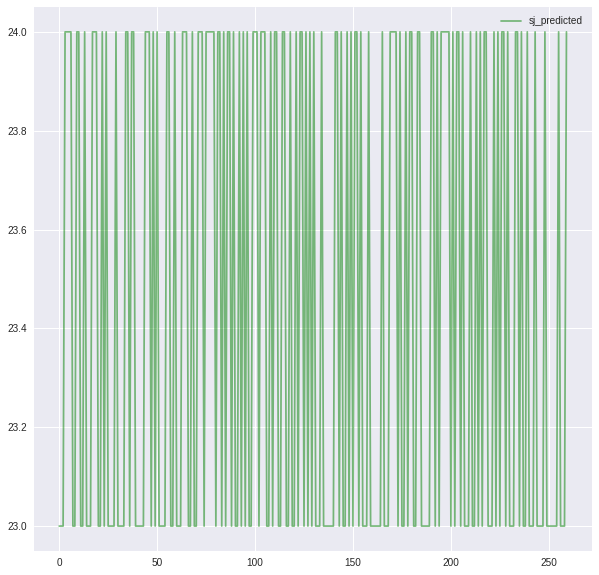

In [2820]:
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns # for visualiation



plt.plot(y_sj_pred1, alpha=.5, color='green', label = "sj_predicted")
plt.legend()

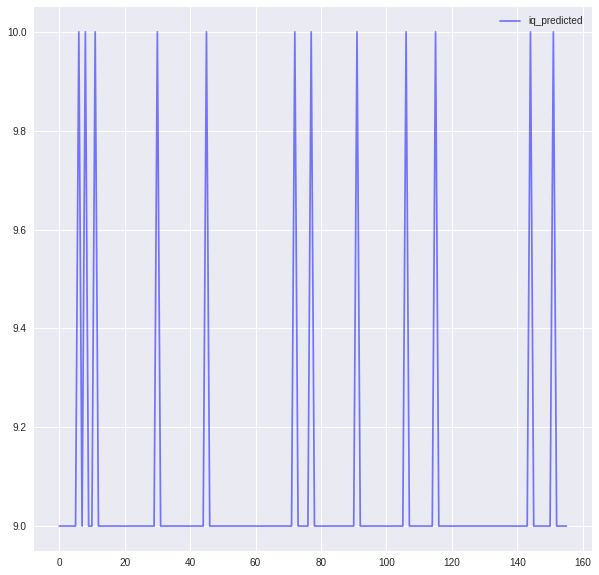

In [2821]:
plt.plot(y_iq_pred1, alpha=.5, color='blue', label = "iq_predicted")
plt.legend()